Elijah Burns <br/>
Phys 434 <br/>
Homework 5

In [169]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

plt.rcParams["figure.figsize"] = (15,15)

In [170]:
bkgd = stats.norm.rvs(loc=0, scale = 2, size = 1000000)
signal = stats.uniform.rvs(loc = 0, scale = 20, size = 1000000)

**Problem 1** <br/>
Create a 2D Histogram of True Signal vs. Observed Signal

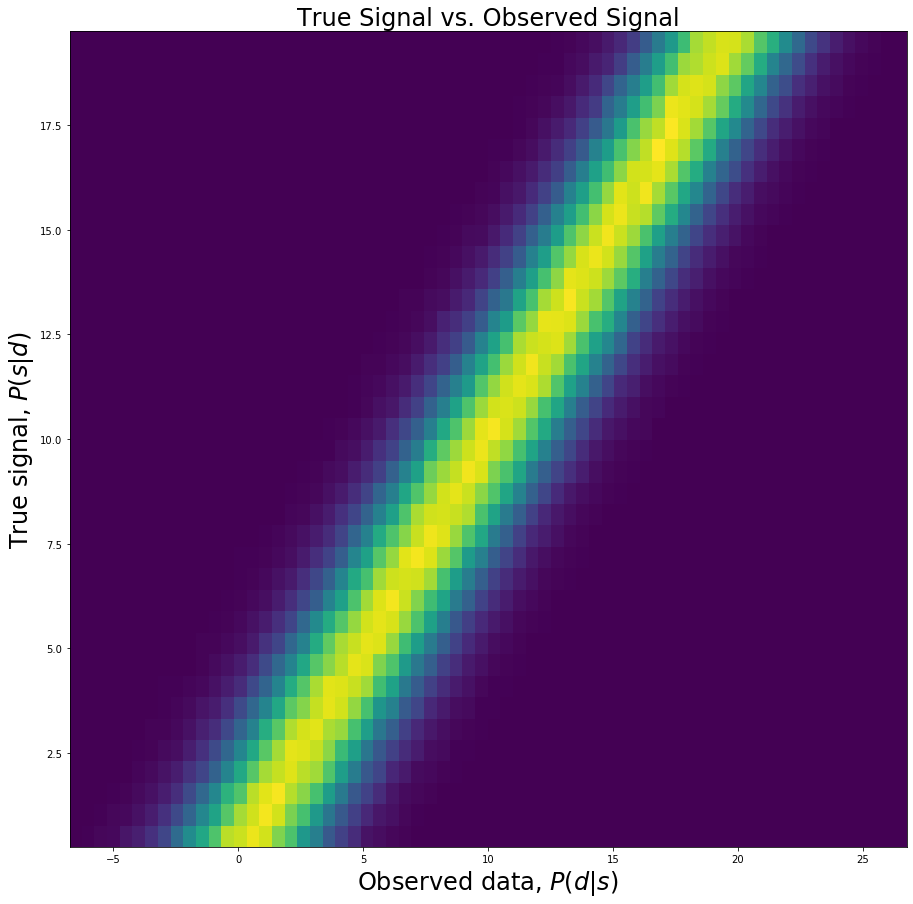

In [171]:
data = bkgd + signal

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.title('True Signal vs. Observed Signal', fontsize = 24)
plt.show()

**Problem 1b** <br/>
**Select a true injected signal and plot  P(d|s) . (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it. [Hint: this was also shown in class.]** <br/>

15.641025641025639


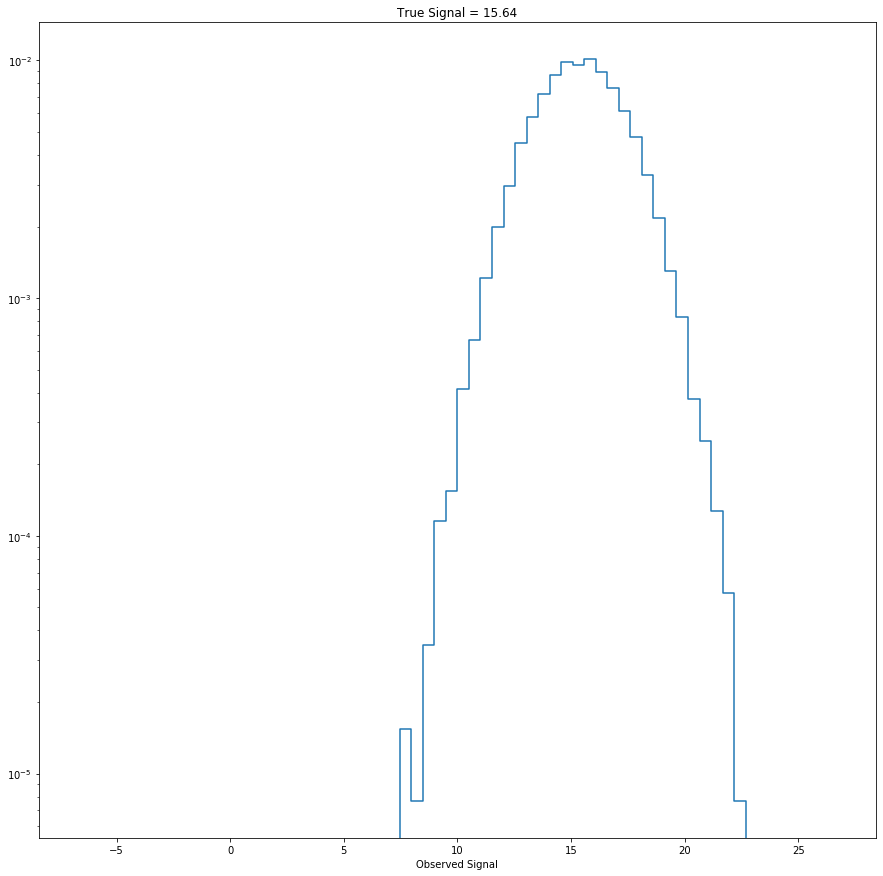

In [172]:
sigindex = 30
print(signalcenters[sigindex])
plt.step(datacenters,Psd[:,sigindex])
plt.yscale('log')
plt.title('True Signal = 15.64')
plt.xlabel('Observed Signal')
plt.show()

Problem 1a Answer: <br/>
What the plot aboves shows is the probability distribution of an observed signal if the true signal was 15.64. From this plot we can interpret the signals that would be observed will most likely be in the range of 10 to 20, with the center of the distribution being very close to 15.

**Problem 1c** <br/>
**Select an observed data value and plot  P(s|d) . (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it.**

8.477611940298509


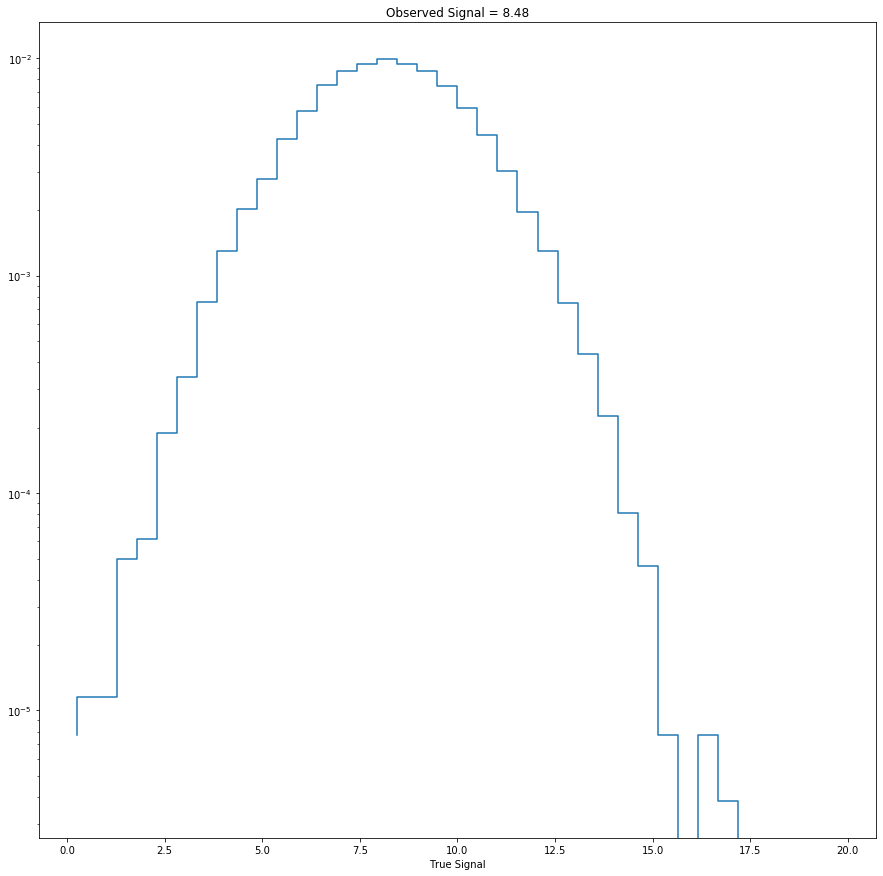

In [173]:
dataindex = 30
print(datacenters[dataindex])
plt.step(signalcenters,Psd[sigindex,:])
plt.yscale('log')
plt.xlabel('True Signal')
plt.title('Observed Signal = 8.48')
plt.show()

Problem 1c Answer: <br/>
This plot shows the probability distribuiton for what the true signal could be if the observed signal is reported as 8.48. To interpret it, we could say that if the observed signal is 8.48, it is very likely that the true signal is in the range of 5 to 10, but it is possible that it could be as small as 0, or as large as 17.5.

**Problem 2
Now repeat the above, but with a background with non-zero mean. The easiest way would be to still have Guassian distribution but with a non-zero mean. [Hint: move it by at least a couple of  σ ]. Reproduce the graphs above. Lastly overplot the  P(d|s)  and  P(s|d)  plots. Why are they not centered on the same value? Explain carefully.**

In [174]:
bkgd2 = stats.norm.rvs(loc=6, scale = 2, size = 1000000)

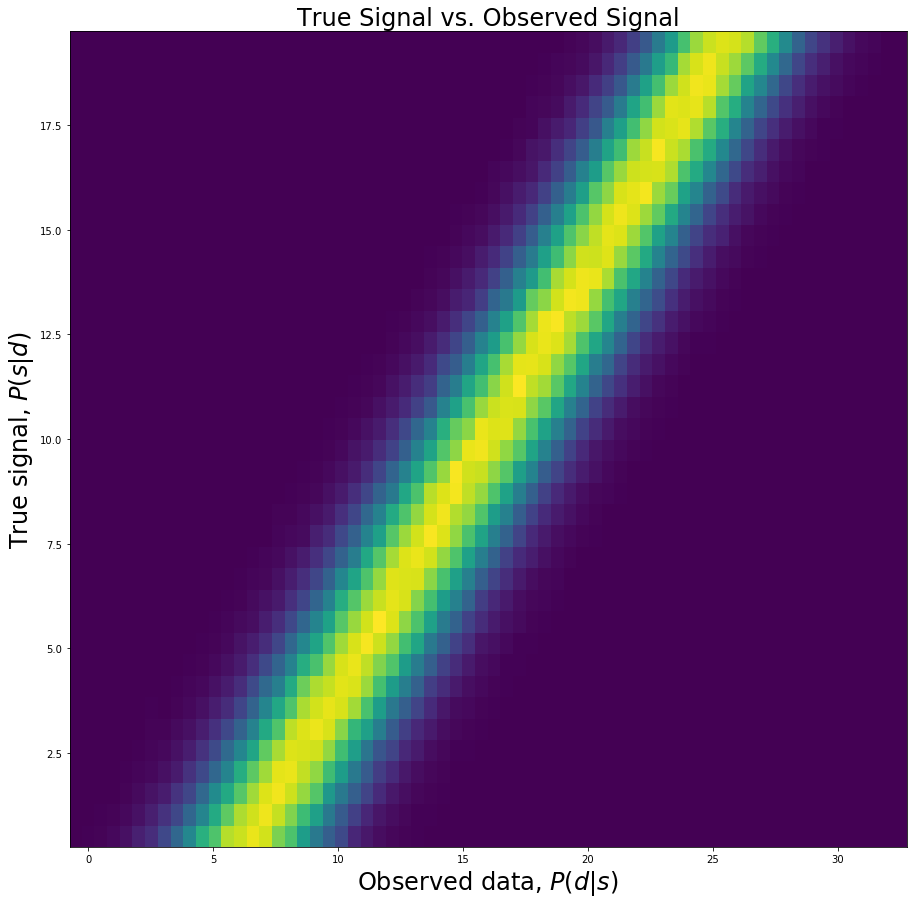

In [175]:
data1 = bkgd2 + signal

signaledges1 = np.linspace(0,20,40)
dataedges1 = np.linspace(-1,33,68)

Psd1, temp1, temp3= np.histogram2d(data1,signal, bins=[dataedges1,signaledges1], density=True)

datacenters1 = (dataedges1[:-1] + dataedges1[1:]) / 2
signalcenters1 = (signaledges1[:-1] + signaledges1[1:]) / 2
plt.pcolormesh(datacenters1,signalcenters1,Psd1.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
plt.title('True Signal vs. Observed Signal', fontsize = 24)
plt.show()

Note: This plot looks nearly identical to the 2D histogram above, but notice how the values for the observed data axis have shifted.

15.641025641025639


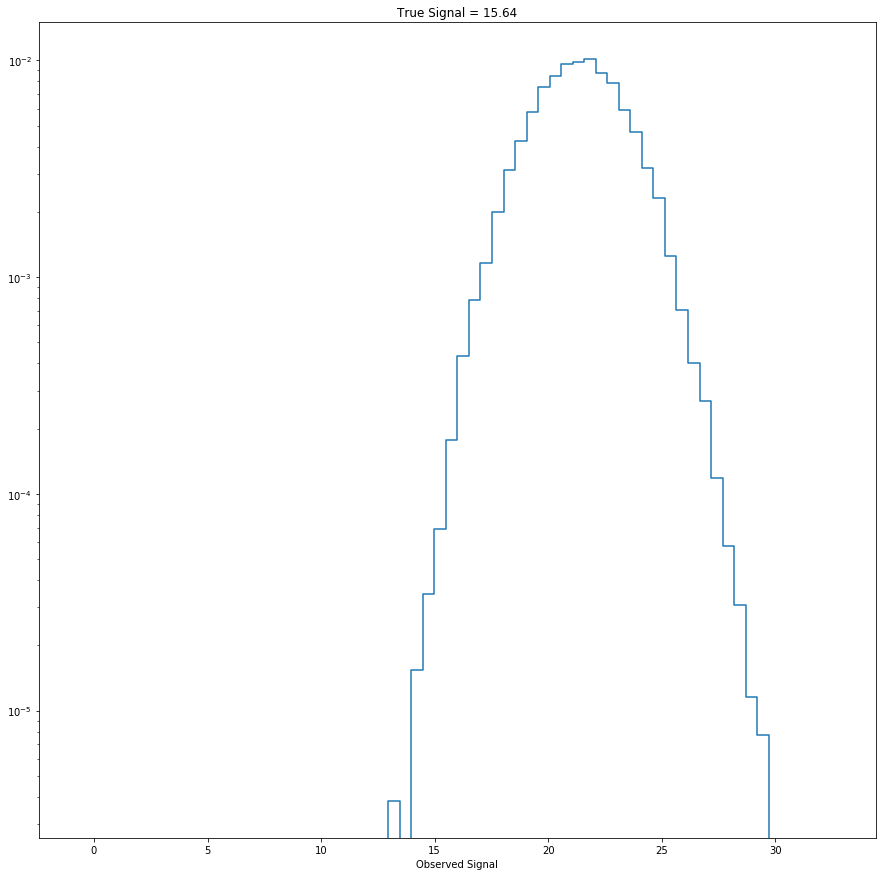

In [176]:
sigindex1 = 30
print(signalcenters1[sigindex1])
plt.step(datacenters1,Psd1[:,sigindex1])
plt.yscale('log')
plt.title('True Signal = 15.64')
plt.xlabel('Observed Signal')
plt.show()

The plot above shows a histogram of what the observed signal could be if the true signal was 15.64. We see the observed signal will likely fall in the range of 17 to 25, but could be as small as 13 or as large as 30.

15.492537313432836


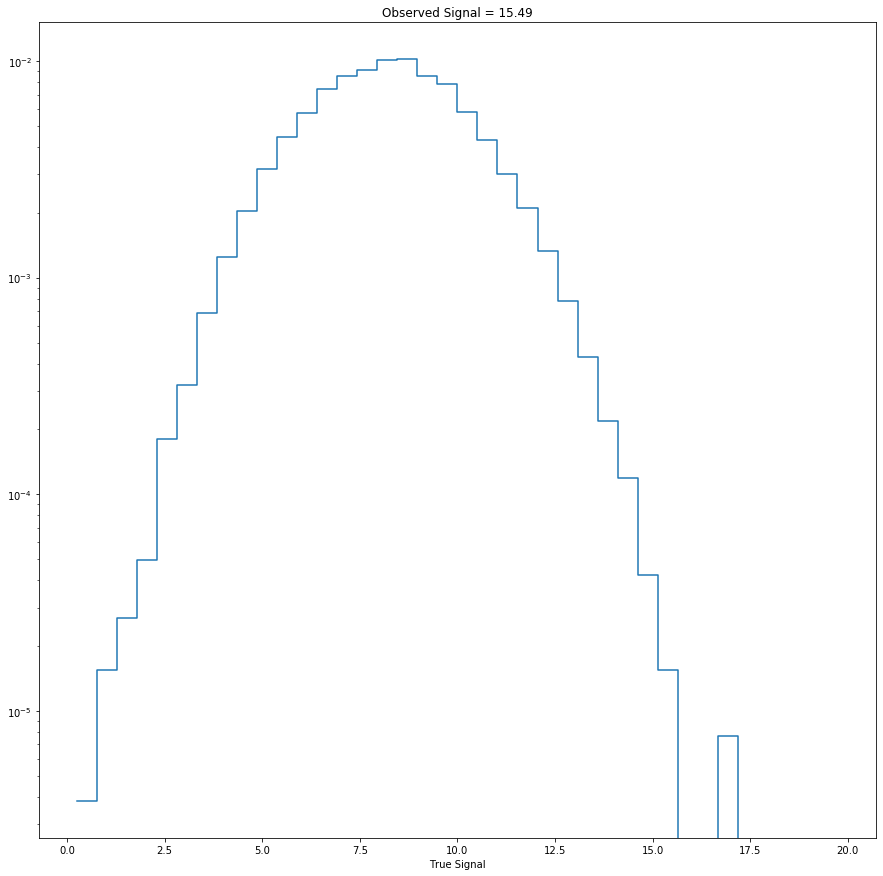

In [181]:
dataindex1 = 32
print(datacenters1[dataindex1])
plt.step(signalcenters1,Psd1[sigindex1,:])
plt.yscale('log')
plt.xlabel('True Signal')
plt.title('Observed Signal = 15.49')
plt.show()

This plot above shows the probability distribution of what the true signal may be is the observed signal is recorded as 15.49. We see the true signal is most likely between 3 and 13, but could be as small as 0, or as large as 17.

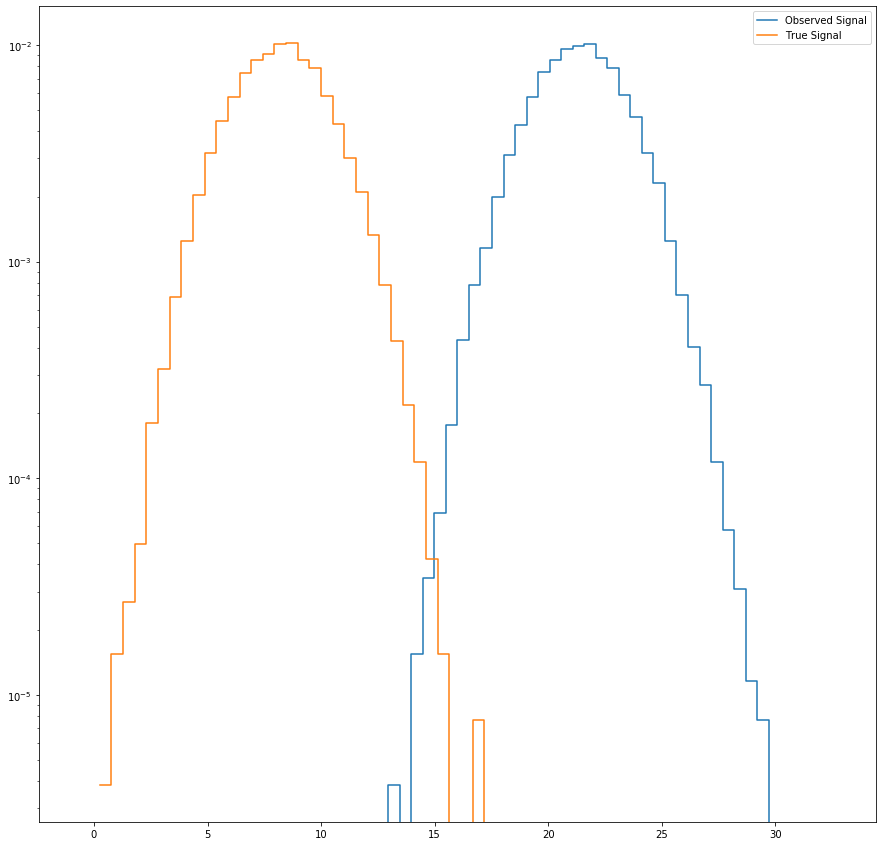

In [178]:
plt.step(datacenters1,Psd1[:,sigindex1],label = 'Observed Signal')
plt.step(signalcenters1,Psd1[sigindex1,:], label = 'True Signal')
plt.legend()
plt.yscale('log')

These probability distributions are not centered on the same value beacuse the background no longer has a mean that is equal to zero, we shifted it up to 6. In other words because we moved the mean of the background up by 6, the relationship between the true signal and the observed signal still increases linearly, but there is now an offset of 6, so the observed signal will always be about 6 higher than the true signal. <br/>
<br/>
We can further see the evidence of this because in the observed signal distribution, it is ceneterd at about 21, when the true signal for that distribution was 15.64, so the observed signal is about 6 higher than the true signal. <br/>
<br/>
In the true signal distribution, the mean is centered around 9, and the observed signal is 15.49, again the observed signal being 6 higher than the true signal.